# IMBD crawling project
## Collecting action genre's 
### title | USgross box office revenue | statscore | critic metascores | critic review texts |  
#### Dataset : [title, US box office revenue, starscore, [(metascores, metatext),(metascores, metatext),(metascores, metatext)...]]

# < 환경 세팅> 중요%%

## !!!! 커스텀 설정 !!!! 부분을 따로 커멘트에 표시해둠 => 3개정도 됨.
## 바로 밑의 모듈들을 현재 주피터 노트북 개발환경(중요)에 속하게 다운 !!주피터가 쓰는 환경으로 pip install

```bs4, urllib3, chromewebdriver, time, lxml, urllib3, csv```

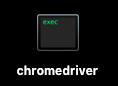

## 위에 모든 모듈을 => 주피터 놑북에서 쓰는 개발환경내에서 pip install


In [60]:
# Import modules 
import bs4
import urllib3
import selenium.webdriver as webdriver
# !!!! 커스텀 설정 !!!! 너의 크롬 드라이버 파일의 디렉토리
from time import sleep
from lxml import html
import urllib3
import csv
import os
# Get html text and let lxml parse it in its own way.
http = urllib3.PoolManager()

# 100page 씩 나누어서 => 5000개의 영화씩 => 한개의 csv파일로도 나누기.
# 적당한 선에서 나누어서 보내주기.

# #1 Store all 'action genre' movie urls to one variable

```whole_title_urls_storage```

In [101]:
# load action genre page
driver = webdriver.Chrome('/Users/sucky/Desktop/chromedriver') 
#action_genre_url = "https://www.imdb.com/search/title?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=cd28805a-4e91-4f0f-b066-0db5ff4dd1a7&pf_rd_r=30AH67YYPH64GCS9CRA9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=boxoffice&ref_=chtbo_gnr_1&genres=action&explore=title_type,genres"
action_genre_url = 'https://www.imdb.com/search/title?title_type=movie&genres=action&sort=boxoffice_gross_us,desc&explore=title_type,genres'
driver.get(action_genre_url)
driver.implicitly_wait(3)

#Save all the link at issue
#1). save all the url links of 253,049 action movies.
whole_title_urls_storage = [] # from
 
#2). iterate with selenium to collect all the links

for i in range(870): # !!! 커스텀 설정 !!! : 현실적으로 데이터 갯수를 줄여야하는 경우 range() 안에 있는 게 <page수> 임
                    # 한 페이지당 영화 50개 이므로 시간 없으면 줄이기, 나는 그냥 테스트용으로 영화 500개 (10페이지만) 해봄.
                    # 액션 영화 전체 페이지는 약 5061페이지인듯함.
    try :
    #wait loading
        driver.implicitly_wait(2)
    
    #get driver's url
        now_url = driver.current_url
        r = http.request('GET', now_url)
        source = r.data
        tree = html.document_fromstring(source)
    
    # get all the href links
        one_page_url_list = ['https://www.imdb.com'+i.get('href') for i in tree.cssselect('div div div div div div div div div h3 a')]
    
    # extend this to whole title urls storage
        whole_title_urls_storage.extend(one_page_url_list)
    
    # click move on to next page
        if now_url == action_genre_url:
            driver.find_element_by_xpath('//*[@id="main"]/div/div[4]/a').click()
        else:
            driver.find_element_by_xpath('//*[@id="main"]/div/div[4]/a[2]').click()
        
    except:
        print('error occured at {}th set'.format(i+202))

os.system('say "your program has been completed."')

TypeError: unsupported operand type(s) for +: 'HtmlElement' and 'int'

# check data size : fix if there are overlaps. (같은 정보만 모이는 버그 방지)

In [102]:
print(len(set(whole_title_urls_storage))) #내가 모은 url이 중복없이 원하는 개수대로 모였는지 확인

3350


## 2. Plan Crawling

### 대체적인 코드 진행
### Open CSV, CSV WRITER
### import csv
### f = open('/Users/sucky/Desktop/outputs/test_output_#{}.csv'.format('final_7'), 'w', encoding='utf-8', newline='')
### wr = csv.writer(f)

## whole intended data = []
# Repeat the following link by link
## a_movie_data = []
## Try:
### <1>. there should be!! 'box office us-gross info including element' 
###         => if year is 2019 
###                      continue (screen recent)
###         find name and make it 'a'
###         find star score and make it 'b'
###         find box office us gross make it 'c'
### <2>.  get Download metascore link => download html => find /<~~>? part to get the clue of into review url of the allpopen review and score page. 
###       Try:
### <3>.  go into the made link get meta score & review each
###          list_of_metascores = []
###          corresponding_reviews = [] 
###          해당 사이트 점수와 리뷰 모두 위의 리스트에 수집
###          for k in range(len(list_of_metascores)):
###          wr.writerow([a, b, c, list_of_metascores[k], corresponding_reviews[k]])
###       except:
###
###          링크가 존재하지 않거나, 리뷰데이터가 없는 경우 바로 다음 루프로 continue
## except:
##       continue
## f.close()



# 3. Crawl !! 

# 아웃풋 창에 => 몇번째 영화까지 진행되는 지 나오니 보면서 .csv파일 잘 써지고 있는지 확인 !
# 에러가 중간 중간 있지만, 데이터량이 충분히 많아서 무시해도 될듯함

In [105]:
# Open .csv file
f = open('/Users/sucky/Desktop/IMBD_final.csv', 'a') # !!!! 커스텀 설정 !!!! : 원하는 '디렉터리/파일명.csv'을 첫번째 인풋에.
wr = csv.writer(f)

# count(url's index)
iter = 2001

# Iterate over collected links
for l in whole_title_urls_storage[2002:]:
    
    # counter
    iter += 1
    print(iter)
    
    # repeat this
    try:
       
        # <Get html and parsed tree>
            # get html of the link
        r = http.request('GET', l) # l is one link from loop
        source = r.data
        
            # parse them into lxml tree
        tree = html.document_fromstring(source) 
        
        # <Filtering out, non-existent url, years > 2018, non-movie)  
        
        # 2). pre save indicator
        #year_elem = tree.cssselect('div div div div div h1 span#titleYear')
        
            # 1). non-movie filter!
        if ('Gross USA:' not in source): #or (len(year_elem) == 0) or (int([k for k in [i.text_content() for i in year_elem]][0].strip('()')) > 2018)
            print('{} non-movie'.format(iter))
            continue
            
        #if len(year_elem) == 0 :
        #    print('{} no year info'.format(iter))
        #    continue
        
        #if int([k for k in [i.text_content() for i in year_elem]][0].strip('()')) > 2018:
        #    print('loss at {} error while year comparison'.format(iter))
        #    continue
            
        # <Get infoS>
            # find a movie name => 'title'
        title_str = [i.text_content().encode('utf-8') for i in tree.cssselect('div div div div div h1')][0]
        title = title_str.split('\xc2')[0]
            # find a movie star score => 'score'
        score = float([i.text_content() for i in tree.cssselect('div div div div div div strong span')][0])
            # find a us_gross_box_office_revenue => 'us_gross'
        gross_str = [i.text_content() for i in tree.cssselect('#main_bottom div#titleDetails.article')][0].encode('utf-8')
        us_gross = int([i for i in gross_str.split('\n') if i.startswith('Gross USA:')][0].split('$')[-1].replace(',',''))
        
        # Get metalink
        # Get html of the metalink
        # find /~~? part to to use as a key into review page.
        # integrate the found ~~ part with 
        # f'https://www.metacritic.com/movie/{john-wick}/critic-reviews' and get that url html
        # case : 1. data exist : crawl
        
        # find the piece
        first_piece = [link[2] for link in tree.cssselect('div div div div.titleReviewBarSubItem div a')[0].iterlinks()][0]
        
        # make 2nd url of l (now link)
        new_list = l.split('/')[:-1]
        new_list.append(first_piece)
        second_url = '/'.join(new_list)
        
        # get html of 2nd url
        r = http.request('GET', second_url)
        source = r.data
        # and parse it
        tree = html.document_fromstring(source)
        # get /~? => matacritic's title from it.
        clue_string = [i for i in tree.cssselect('div div.see-more')[0].iterlinks()][0][2].split('?')[0].split('/')[-1]
        # get 3rd url out of clue string
        all_review_url = 'https://www.metacritic.com/movie/{}/critic-reviews'.format(clue_string)
        
        #<in the all_review_url> - make a list of scores and a list of texts.
        #    get html of all_review_url
        r = http.request('GET', all_review_url)
        source = r.data
        tree = html.document_fromstring(source)
        
        #     get a list of critic scores
        lists_of_each_text_list = []
        list_of_critic_scores = []

        for i in tree.cssselect('div.left.fl'):
            lists_of_each_text_list.append(i.text_content())

        for k in range(len(lists_of_each_text_list)):
            list_of_critic_scores.append(int(lists_of_each_text_list[k].split('\n')[4]))
        #<list_of_critic_scores> completed!!
        
        #     get a list of critic texts
        a_movie_critic_texts_list = []
        for j in tree.cssselect('div div div div div div div div a.no_hover'):
            a_critic_text = j.text_content().strip().encode('utf-8')
            a_movie_critic_texts_list.append(a_critic_text)
    
        #<a_movie_critic_texts_list> completed
        
        #write line by line into csv file
        
        for c in range(len(list_of_critic_scores)):
            wr.writerow([title, score, us_gross,list_of_critic_scores[c],a_movie_critic_texts_list[c]])
            
    # if it's another case!        
    except Exception as e:
        print("unknown error at url index {}".format(iter)) # ignore if there are already so many data.
        continue
        
# Close csv.file
f.close()

# Tell me
os.system('say "your program has been completed."')

2002
2003
unknown error at url index 2003
2004
unknown error at url index 2004
2005
unknown error at url index 2005
2006
unknown error at url index 2006
2007
unknown error at url index 2007
2008
2009
unknown error at url index 2009
2010
unknown error at url index 2010
2011
unknown error at url index 2011
2012
unknown error at url index 2012
2013
unknown error at url index 2013
2014
unknown error at url index 2014
2015
unknown error at url index 2015
2016
unknown error at url index 2016
2017
unknown error at url index 2017
2018
unknown error at url index 2018
2019
unknown error at url index 2019
2020
unknown error at url index 2020
2021
unknown error at url index 2021
2022
unknown error at url index 2022
2023
unknown error at url index 2023
2024
unknown error at url index 2024
2025
unknown error at url index 2025
2026
unknown error at url index 2026
2027
unknown error at url index 2027
2028
unknown error at url index 2028
2029
unknown error at url index 2029
2030
unknown error at url in

unknown error at url index 2234
2235
unknown error at url index 2235
2236
unknown error at url index 2236
2237
unknown error at url index 2237
2238
unknown error at url index 2238
2239
unknown error at url index 2239
2240
unknown error at url index 2240
2241
unknown error at url index 2241
2242
unknown error at url index 2242
2243
unknown error at url index 2243
2244
unknown error at url index 2244
2245
unknown error at url index 2245
2246
unknown error at url index 2246
2247
unknown error at url index 2247
2248
unknown error at url index 2248
2249
unknown error at url index 2249
2250
unknown error at url index 2250
2251
unknown error at url index 2251
2252
unknown error at url index 2252
2253
unknown error at url index 2253
2254
unknown error at url index 2254
2255
unknown error at url index 2255
2256
unknown error at url index 2256
2257
unknown error at url index 2257
2258
unknown error at url index 2258
2259
unknown error at url index 2259
2260
unknown error at url index 2260
2261
u

2482 non-movie
2483
2483 non-movie
2484
2484 non-movie
2485
2485 non-movie
2486
2486 non-movie
2487
2487 non-movie
2488
2488 non-movie
2489
2489 non-movie
2490
2490 non-movie
2491
2491 non-movie
2492
2492 non-movie
2493
2493 non-movie
2494
2494 non-movie
2495
2495 non-movie
2496
2496 non-movie
2497
2497 non-movie
2498
2498 non-movie
2499
2499 non-movie
2500
2500 non-movie
2501
2501 non-movie
2502
2502 non-movie
2503
2503 non-movie
2504
2504 non-movie
2505
2505 non-movie
2506
2506 non-movie
2507
2507 non-movie
2508
2508 non-movie
2509
2509 non-movie
2510
2510 non-movie
2511
2511 non-movie
2512
2512 non-movie
2513
2513 non-movie
2514
2514 non-movie
2515
2515 non-movie
2516
2516 non-movie
2517
2517 non-movie
2518
2518 non-movie
2519
2519 non-movie
2520
2520 non-movie
2521
2521 non-movie
2522
2522 non-movie
2523
2523 non-movie
2524
2524 non-movie
2525
2525 non-movie
2526
2526 non-movie
2527
2527 non-movie
2528
2528 non-movie
2529
2529 non-movie
2530
2530 non-movie
2531
2531 non-movie
2532


2892 non-movie
2893
2893 non-movie
2894
2894 non-movie
2895
2895 non-movie
2896
2896 non-movie
2897
2897 non-movie
2898
2898 non-movie
2899
2899 non-movie
2900
2900 non-movie
2901
2901 non-movie
2902
2902 non-movie
2903
2903 non-movie
2904
2904 non-movie
2905
2905 non-movie
2906
2906 non-movie
2907
2907 non-movie
2908
2908 non-movie
2909
2909 non-movie
2910
2910 non-movie
2911
2911 non-movie
2912
2912 non-movie
2913
2913 non-movie
2914
2914 non-movie
2915
2915 non-movie
2916
2916 non-movie
2917
2917 non-movie
2918
2918 non-movie
2919
2919 non-movie
2920
2920 non-movie
2921
2921 non-movie
2922
2922 non-movie
2923
2923 non-movie
2924
2924 non-movie
2925
2925 non-movie
2926
2926 non-movie
2927
2927 non-movie
2928
2928 non-movie
2929
2929 non-movie
2930
2930 non-movie
2931
2931 non-movie
2932
2932 non-movie
2933
2933 non-movie
2934
2934 non-movie
2935
2935 non-movie
2936
2936 non-movie
2937
2937 non-movie
2938
2938 non-movie
2939
2939 non-movie
2940
2940 non-movie
2941
2941 non-movie
2942


3302 non-movie
3303
3303 non-movie
3304
3304 non-movie
3305
3305 non-movie
3306
3306 non-movie
3307
3307 non-movie
3308
3308 non-movie
3309
3309 non-movie
3310
3310 non-movie
3311
3311 non-movie
3312
3312 non-movie
3313
3313 non-movie
3314
3314 non-movie
3315
3315 non-movie
3316
3316 non-movie
3317
3317 non-movie
3318
3318 non-movie
3319
3319 non-movie
3320
3320 non-movie
3321
3321 non-movie
3322
3322 non-movie
3323
3323 non-movie
3324
3324 non-movie
3325
3325 non-movie
3326
3326 non-movie
3327
3327 non-movie
3328
3328 non-movie
3329
3329 non-movie
3330
3330 non-movie
3331
3331 non-movie
3332
3332 non-movie
3333
3333 non-movie
3334
3334 non-movie
3335
3335 non-movie
3336
3336 non-movie
3337
3337 non-movie
3338
3338 non-movie
3339
3339 non-movie
3340
3340 non-movie
3341
3341 non-movie
3342
3342 non-movie
3343
3343 non-movie
3344
3344 non-movie
3345
3345 non-movie
3346
3346 non-movie
3347
3347 non-movie
3348
3348 non-movie
3349
3349 non-movie


0

# 연습장

In [51]:
r = http.request('GET', 'https://www.imdb.com/title/tt3385516/?ref_=adv_li_tt')
source = r.data
tree = html.document_fromstring(source)
#year_elem = tree.cssselect('div div div div div h1 span#titleYear')
#[k for k in [i.text_content() for i in year_elem]][0].strip('()')
#title_str = [i.text_content().encode('utf-8') for i in tree.cssselect('div div div div div h1')][0]
#title_str.split('\xc2')[0]
#float([i.text_content() for i in tree.cssselect('div div div div div div strong span')][0])
#gross_str = [i.text_content() for i in tree.cssselect('#main_bottom div#titleDetails.article')][0].encode('utf-8')
#int([i for i in gross_str.split('\n') if i.startswith('Gross USA:')][0].split('$')[-1].replace(',',''))
first_piece = [link[2] for link in tree.cssselect('div div div div.titleReviewBarSubItem div a')[0].iterlinks()][0]
new_list = 'https://www.imdb.com/title/tt3385516/?ref_=adv_li_tt'.split('/')[:-1]
new_list.append(first_piece)
second_link = '/'.join(new_list)

r = http.request('GET', second_link)
source = r.data
tree = html.document_fromstring(source)
# find clue there
clue_string = [i for i in tree.cssselect('div div.see-more')[0].iterlinks()][0][2].split('?')[0].split('/')[-1]
all_review_url = "https://www.metacritic.com/movie/{}/critic-reviews".format(clue_string)

# get html of all_review_url
r = http.request('GET', all_review_url)
source = r.data
tree = html.document_fromstring(source)

# get a list of critic scores and texts
lists_of_each_text_list = []
list_of_critic_scores = []

for i in tree.cssselect('div.left.fl'):
    lists_of_each_text_list.append(i.text_content())

for k in range(len(lists_of_each_text_list)):
    list_of_critic_scores.append(int(lists_of_each_text_list[k].split('\n')[4]))

print(len(list_of_critic_scores))

# get a list of critic texts
a_movie_critic_texts_list = []
for j in tree.cssselect('div div div div div div div div a.no_hover'):
    a_critic_text = j.text_content().strip().encode('utf-8')
    a_movie_critic_texts_list.append(a_critic_text)
    
print(len(a_movie_critic_texts_list))
    


48
48


In [154]:
f = open('/Users/sucky/Desktop/test.csv', 'w')
wr = csv.writer(f)

string = tree.cssselect('div div div div div div div div a.no_hover')[0].text_content().strip()

wr.writerow([1,string.encode('utf-8')])
wr.writerow([2,string.encode('utf-8')])

# Close CSV file.
f.close()

In [85]:
a = [1,2,34,5,1]
a[2:]

[34, 5, 1]

In [99]:
test = batch_one_list[0]
test

'https://www.imdb.com/title/tt0445548/?ref_=adv_li_tt'